In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

ind_num = 2 #一世代の個体数
gen_num = 1000 #目標の世代数
co_method_num = 0 #交叉の方法
selection_method_num = 0 #淘汰の方法
mutation_probability = 0.1 #突然変異の確率
point_num = 8



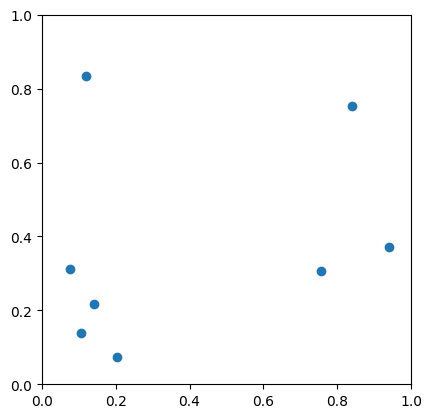

In [3]:

#point_list = list(range(point_num))
xPos = np.random.rand(point_num)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(point_num)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [5]:
class Individual:
  coordinate = 0
  point_num = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.point_num))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosomse(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [6]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [7]:
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
test_ind = Individual()
print(test_ind.chromosome)
print(test_ind.fitness)

mutation_ALL(test_ind)

test_ind.getFitness()
print(test_ind.chromosome)
print(test_ind.fitness)

[7, 6, 4, 5, 2, 1, 0, 3]
4.172134038580635
[4, 0, 6, 7, 3, 2, 5, 1]
5.6708366076903705


In [38]:
class TestCO:
  def co(self,input):
    leng = len(input)
    for i in range(0, leng, 2):
      p1 = copy.deepcopy(input[i].chromosome)
      p2 = copy.deepcopy(input[i+1].chromosome)
      ret = self.cotst1201(p1,p2)

      input.append(Individual(ret[0]))
      input.append(Individual(ret[1]))



  def cotst1201(self,input1, input2):
    #print("start co")
    p1 = copy.deepcopy(input1)
    p2 = copy.deepcopy(input2)
    c1 = [-1] * len(p1) #-1で埋めた配列を作成
    c2 = [-1] * len(p2)
    r = random.randrange(len(p1))
    print(r ,"番目") 
    c1[r] = p1[r]
    c2[r] = p2[r]

    index1 = p1.index(p2[r])
    index2 = p2.index(p1[r])

    c1[index1] = p1[index1]
    c2[index2] = p2[index2]

    #print(c1)
    #print(c2)
      
    del1 = p1.pop(r)
    del2 = p2.pop(r)
    if not del1 == del2:
      p1.remove(del2)
      p2.remove(del1)

    #print(p1)
    #print(p2)
    cout1 = cout2 = 0
    for i in range(len(c1)):
    
      if c1[i] == -1:
        c1[i] = p2[cout1]
        cout1 += 1
      if c2[i] == -1:
        c2[i] = p1[cout2]
        cout2 += 1

    
    #print(c1)
    #print(c2)
    #print("end co")
    return [c1,c2]

In [40]:
genelation=[]
plot_lst = list()
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(ind_num):
  genelation.append(Individual())
genelation[0].setChromosome([0,1,2,3,4,5,6,7])
genelation[1].setChromosome([7, 4, 6, 2, 3, 0, 1, 5])

for i in range(ind_num):
  print(genelation[i].chromosome)

clossOver = TestCO()
clossOver.co(genelation)
print("\n")

for i in range(4):
  print(genelation[i].chromosome)


[0, 1, 2, 3, 4, 5, 6, 7]
[7, 4, 6, 2, 3, 0, 1, 5]
6 番目


[0, 1, 2, 3, 4, 5, 6, 7]
[7, 4, 6, 2, 3, 0, 1, 5]
[7, 1, 4, 2, 3, 0, 6, 5]
[0, 2, 6, 3, 4, 5, 1, 7]
